## Latar Belakang
Transportation Security Administration (TSA) dibentuk pada tahun 2002, TSA merupakan salah satu bentuk respon dari kejadian serangan 11 September. TSA membuat kebijakan pemeriksaan keamanan di sebagian besar bandara Amerika Serikat. Dengan banyaknya penumpang yang harus diperiksa di sebagian besar bandara , terkadang penumpang mengalami kejadian yang tidak diinginkan saat melalui proses TSA. Kejadian itu seperti barang tertinggal, barang mengalami kerusakan, barang penumpang dicuri dan lain sebagainya. Namun seperti yang disebutkan dalam undang-undang Amerika Serikat, TSA telah menyiapkan proses klaim di mana penumpang dapat mengajukan klaim untuk meminta kompensas atas dugaan kesalahan yang disebabkan oleh TSA.

Sumber : Website  TSA

# 1. Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database). 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from scipy.stats import kruskal


In [3]:
df = pd.read_csv('tsa_claims.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_22284\1986668801.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Title: TSA Claims
Size: 13 kolom dan 204,267 baris
TSA Claims Database merupakan data pengajuan klaim di bandara pada tahun 2002-2015. Dataset ini berisikan informasi tentang:

- Claim Number: Nomor klaim pelanggan
- Date Received: Tanggal klaim diterima
- Incident Date: Tanggal kejadian penyebab klaim
- Airport Code: Kode bandara kejadian
- Airport Name: Nama bandara kejadian
- Airline Name: Nama maskapai penerbangan yang terkait
- Claim Type: Jenis klaim yang diajukan
- Claim Site: Lokasi pengajuan klaim
- Item: Barang yang diklaim
- Claim Amount: Nominal klaim yang diajukan
- Status: Status klaim
- Close Amount: Nominal klaim yang diberikan
- Disposition: Penyelesaian klaim yang diajukan
Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [4]:
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## Jumlah data yang hilang

In [5]:
df.isna().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

## Jumlah nul dan jumlah persentase nul di data ini

In [6]:
null = df.isna().sum()
pernull = pd.concat([null,null/len(df)*100],axis=1,keys=['Null','Persen Null'])
pernull

,Null,Persen Null
Claim Number,0,0.000000
Date Received,263,0.128753
Incident Date,2183,1.068699
Airport Code,8524,4.172970
Airport Name,8524,4.172970
Airline Name,34374,16.827975
Claim Type,7913,3.873851
Claim Site,740,0.362271
Item,3966,1.941576
Claim Amount,4043,1.979272


Deskripsi data

In [7]:
df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


Jumlah Value Unique di dalam data

In [8]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Claim Number,204258,"[0909802M, 0202417M, 0202445M, 0909816M, 20050..."
1,Date Received,4007,"[4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe..."
2,Incident Date,26807,"[12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0..."
3,Airport Code,465,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ..."
4,Airport Name,485,"[Newark International Airport, Seattle-Tacoma ..."
5,Airline Name,318,"[Continental Airlines, nan, American Airlines,..."
6,Claim Type,11,"[Property Damage, Passenger Property Loss, nan..."
7,Claim Site,6,"[Checkpoint, Checked Baggage, Other, Motor Veh..."
8,Item,4704,"[Other, Luggage (all types including footlocke..."
9,Claim Amount,36117,"[$350.00 , $100.00 , $278.88 , $50.00 , $84.79..."


Melihat value yang unik

In [9]:
pd.set_option('display.max_colwidth', -1)
cols =df.columns
res = []

for i in cols:
    res.append([i,df[i].unique()])

pd.DataFrame(res,columns=['Nama Kolom','Value Unik'])

C:\Users\user\AppData\Local\Temp\ipykernel_22284\1003291540.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Nama Kolom  \
0   Claim Number    
1   Date Received   
2   Incident Date   
3   Airport Code    
4   Airport Name    
5   Airline Name    
6   Claim Type      
7   Claim Site      
8   Item            
9   Claim Amount    
10  Status          
11  Close Amount    
12  Disposition     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

data duplikat
- terdapat data duplikat sebanyak 9 data di dataframe ini dan akan di hapus

In [10]:
df[df['Claim Number'].duplicated()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
186744,2013081805991,13-Jan-14,21-Dec-12,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,$0.00,Deny,NaN,NaN
186836,2013053003894,18-Apr-14,22-Apr-13,ACY,Atlantic City International,-,Motor Vehicle,Motor Vehicle,Baggage/Cases/Purses,$2;233.86,Settle,NaN,NaN
186837,2013081205863,24-Apr-14,2-Aug-13,ZZX,Non TSA Airport (motor vehicle),-,Personal Injury,Motor Vehicle,-,$20;000.00,Settle,NaN,NaN
186838,2013082906390,3-Jul-14,23-Jul-13,BNA,Nashville International,Southwest Airlines,Personal Injury,Checkpoint,Other,-,-,NaN,NaN
186842,2013103108490,22-May-14,26-Sep-13,ZZX,Non TSA Airport (motor vehicle),-,Personal Injury,Motor Vehicle,-,-,-,NaN,NaN
186844,2013121110011,21-Jul-14,15-May-13,JAX,Jacksonville International,-,Personal Injury,Checkpoint,-,-,-,NaN,NaN
186846,2013123010324,21-May-14,30-Nov-13,MCO,Orlando International Airport,Delta Air Lines,Personal Injury,Checkpoint,-,$0.00,Deny,NaN,NaN
196321,2013050203487,27-Feb-15,21-Jan-13,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,-,$0.00,Deny,NaN,NaN


hapus duplicate yang sama di claim number

In [11]:
df['Claim Number'].drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

1

## Status

jumlah status

In [13]:
df['Status'].value_counts()

Denied                                                                                                                           68339
Approved                                                                                                                         34999
Deny                                                                                                                             28237
Settled                                                                                                                          27958
-                                                                                                                                12752
Approve in Full                                                                                                                  12364
Canceled                                                                                                                         7018 
Settle                                                 

## Dibawah ini saya menyederhanakan Colom status yang mempunyai isi tidak seragam tetapi mempunyai arti yang sama 

mengganti deny menjadi denied

In [14]:
df['Status'] = df['Status'].replace('Deny', 'Denied')

mengganti canceled menjadi denied

In [15]:
df['Status'] = df['Status'].replace('Canceled', 'Denied')

mengganti seetle menjadi settled

In [16]:
df['Status'] = df['Status'].replace('Settle','Settled')

mengganti in litigation menjadi proses

In [17]:
df['Status'] = df['Status'].replace('In litigation','In Process')

mengganti In review

In [18]:
df['Status'] = df['Status'].replace('In review','In Process')

mengganti in Claim entered

In [19]:
df['Status'] = df['Status'].replace('Claim entered','In Process')

mengganti claim has been assigned

In [20]:
df['Status'] = df['Status'].replace('Claim has been assigned for further investigation','In Process')

mengganti pending response 

In [21]:
df['Status'] = df['Status'].replace('Pending response from claimant','In Process')

Mengganti Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.

In [22]:
df['Status'] = df['Status'].replace('Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.','Denied')

Mengganti Closed as a contractor claim menjadi In Process

In [23]:
df['Status'] = df['Status'].replace('Closed as a contractor claim','In Process')

Setelah berhasil diganti sekarang data di kolom status menjadi 6 saja seperti dibawah

In [24]:
df['Status'].value_counts()

Denied             108975
Approved           34999 
Settled            33724 
-                  12752 
Approve in Full    12364 
In Process         1448  
Name: Status, dtype: int64

Mengganti data yang berisi (-) dengan null

In [25]:
cols = df.columns

for i in cols:
    df[i] = df[i].replace('-', np.NaN)

mengganti Nan dengan Unknown

In [26]:
df['Status'].fillna('Unknown',inplace=True)
df['Status'].value_counts()


Denied             108975
Approved           34999 
Settled            33724 
Unknown            12757 
Approve in Full    12364 
In Process         1448  
Name: Status, dtype: int64

In [27]:
df['Status'].value_counts()

Denied             108975
Approved           34999 
Settled            33724 
Unknown            12757 
Approve in Full    12364 
In Process         1448  
Name: Status, dtype: int64

In [28]:
df['Item'] = df['Item'].str.split(r"-|;", expand=True)[0]

## 2 Mengisi VALUE yang hilang

Mengisi Airport Code dan Airport Name dengan Unkown

In [29]:
df[['Airport Code','Airport Name']].isna().sum()

Airport Code    8965
Airport Name    8965
dtype: int64

Mengisi airport code  dan airport name yang hilang dengan Unknown

In [30]:
df['Airport Code'].fillna('Unknown',inplace=True)
df['Airport Name'].fillna('Unknown',inplace=True)

## Airline Name

In [31]:
df['Airline Name'].isna().sum()

38621

Mengisi airline name yang nan

In [32]:
df['Airline Name'] = df.groupby(['Incident Date','Airport Code'])['Airline Name'].bfill().ffill()

## Claim Type dan Claim Syte

In [33]:
df[['Claim Type','Claim Site']].isna().sum()

Claim Type    8195
Claim Site    1016
dtype: int64

Menggaanti claim type dan claim site dengan Unknown dikarenakan data yang hilang 

In [34]:
df['Claim Type'].fillna('Unknown',inplace=True)
df['Claim Site'].fillna('Unknown',inplace=True)

## Disposition

Mengisi disposition yang NAN dengan Value yang ada di Status

In [35]:
df['Disposition'].fillna(df['Status'],inplace=True)

## Date Received AND Incidnt Date

In [36]:
df.style.format({"Incident Date": lambda t: t.strftime("%y")})
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,Unknown,NaN,Unknown
204263,2015123027969,17-Dec-15,2-Dec-15,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,NaN,Unknown,NaN,Unknown
204264,2016010428072,22-Dec-15,20-Dec-15,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,NaN,Unknown,NaN,Unknown
204265,2016011328300,30-Dec-15,28-Dec-15,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,Unknown,NaN,Unknown


In [37]:
import re

Mengganti TYPE DATA Incident date menjadi Date & Time

In [38]:

def split_tanggal (x):
        if type(x) == float:
           return i
        else :
            a=x.split()[0]
            return a
df['Incident Date']=df['Incident Date'].apply(split_tanggal)            
df
# df['Incident Date A'] = df['Incident Date'].str.split()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004,SEA,Seattle-Tacoma International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,Unknown,NaN,Unknown
204263,2015123027969,17-Dec-15,2-Dec-15,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,NaN,Unknown,NaN,Unknown
204264,2016010428072,22-Dec-15,20-Dec-15,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,NaN,Unknown,NaN,Unknown
204265,2016011328300,30-Dec-15,28-Dec-15,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,Unknown,NaN,Unknown


In [39]:
def garis (x):
        if type(x) == float:
           return i
        else :
            a=x.replace('/', '-')
            return a
df['Incident Date']=df['Incident Date'].apply(garis)

Untuk memishakan format tanggal

In [40]:
df['Incident Date'].apply(split_tanggal)

0         12-12-2002
1         1-16-2004 
2         11-26-2003
3         1-6-2003  
4         2-5-2005  
            ...     
204262    16-Oct-15 
204263    2-Dec-15  
204264    20-Dec-15 
204265    28-Dec-15 
204266    23-Nov-15 
Name: Incident Date, Length: 204267, dtype: object

In [41]:
df['Date Received'] = pd.to_datetime(df['Date Received'], errors='coerce')
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df.dropna(subset=['Date Received', 'Incident Date'], inplace=True)

In [42]:
odd_dates = df[df['Date Received'] < df['Incident Date']]
odd_dates.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby,$84.79,Approved,$84.79,Approve in Full


In [43]:
df = df.drop(odd_dates.index)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,$75.00,Approved,$75.00,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,$2;270.09,Denied,NaN,Denied
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,$4;457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,$16.71,Approved,$17.00,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,$450.00,Denied,NaN,Denied


Membuang tanggal yang tidak diperlukan karena saya akan menganalisa dari tahun 2002 sampai 2015

menukar Date Received dengan Incident Date karena di beberapa tanggal ada yang lebih dulu Date Receivenya sebelom Incident Date

In [44]:
df.drop(df[df['Date Received'].dt.year < 2002].index, inplace=True)
df.drop(df[df['Incident Date'].dt.year < 2002].index, inplace=True)
df.drop(df[df['Date Received'].dt.year > 2015].index, inplace=True)
df.drop(df[df['Incident Date'].dt.year > 2015].index, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200119 entries, 7 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   200119 non-null  object        
 1   Date Received  200119 non-null  datetime64[ns]
 2   Incident Date  200119 non-null  datetime64[ns]
 3   Airport Code   200119 non-null  object        
 4   Airport Name   200119 non-null  object        
 5   Airline Name   200119 non-null  object        
 6   Claim Type     200119 non-null  object        
 7   Claim Site     200119 non-null  object        
 8   Item           192024 non-null  object        
 9   Claim Amount   184922 non-null  object        
 10  Status         200119 non-null  object        
 11  Close Amount   132688 non-null  object        
 12  Disposition    200119 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 21.4+ MB


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,$75.00,Approved,$75.00,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,$2;270.09,Denied,NaN,Denied
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,$4;457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,$16.71,Approved,$17.00,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,$450.00,Denied,NaN,Denied


## Claim amount dan Close Amount

Menghilangkan simbol dolar '$' dan titik-koma ';' pada kolom 'Claim Amount' dan 'Close Amount'

In [45]:
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '') #Menghapus simbol dolar pada kolom 'Claim Amount'
df['Claim Amount'] = df['Claim Amount'].str.replace(';', '') #Menghapus titik-koma pada kolom 'Claim Amount'



C:\Users\user\AppData\Local\Temp\ipykernel_22284\3741898661.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Claim Amount'] = df['Claim Amount'].str.replace('$', '') #Menghapus simbol dolar pada kolom 'Claim Amount'


In [46]:
df['Close Amount'] = df['Close Amount'].str.replace('$', '') 
df['Close Amount'] = df['Close Amount'].str.replace(';', '') 

C:\Users\user\AppData\Local\Temp\ipykernel_22284\2901586897.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close Amount'] = df['Close Amount'].str.replace('$', '')


## Mengganti Dtype claim Amount dan close Amount menjadi numeric (folat64)

In [47]:
df['Close Amount'] = pd.to_numeric(df['Close Amount'])

In [48]:
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'])


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200119 entries, 7 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   200119 non-null  object        
 1   Date Received  200119 non-null  datetime64[ns]
 2   Incident Date  200119 non-null  datetime64[ns]
 3   Airport Code   200119 non-null  object        
 4   Airport Name   200119 non-null  object        
 5   Airline Name   200119 non-null  object        
 6   Claim Type     200119 non-null  object        
 7   Claim Site     200119 non-null  object        
 8   Item           192024 non-null  object        
 9   Claim Amount   184922 non-null  float64       
 10  Status         200119 non-null  object        
 11  Close Amount   132688 non-null  float64       
 12  Disposition    200119 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 21.4+ MB


## Mengisi Claim amount

In [50]:
df['Claim Amount'] = np.where((df['Claim Amount'].isna()==True) & ((df['Status'] == 'Approve in Full') | (df['Status'] == 'Settle')),df['Close Amount'],df['Claim Amount'])

In [51]:
df['Claim Amount'].fillna(df['Claim Amount'].median(),inplace=True)

## Mengisi close amount dengan claim amount apa bila approve in full

In [52]:
df['Close Amount'] = np.where((df['Close Amount'].isna()==True) & (df['Status'] == 'Approve in Full'),df['Claim Amount'],df['Close Amount'])
df['Close Amount'] = np.where((df['Close Amount'].isna()==True) & (df['Status'] == 'Settle'),df['Close Amount'].median(),df['Close Amount'])

In [53]:
df['Close Amount'].fillna(0,inplace=True)

In [54]:
df.isna().sum()

Claim Number     0   
Date Received    0   
Incident Date    0   
Airport Code     0   
Airport Name     0   
Airline Name     0   
Claim Type       0   
Claim Site       0   
Item             8095
Claim Amount     0   
Status           0   
Close Amount     0   
Disposition      0   
dtype: int64

## ITEM

In [55]:
df['Item'].value_counts().head(5)

Other                                        36620
Luggage (all types including footlockers)    18649
Clothing                                     17028
Cameras                                      11842
Jewelry                                      11140
Name: Item, dtype: int64

In [56]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])

In [57]:
df.groupby('Airport Code')[['Claim Type', 'Claim Site']].agg(pd.Series.mode).reset_index().tail(30)

,Airport Code,Claim Type,Claim Site
435,TSA,Property Damage,Checked Baggage
436,TTN,Passenger Property Loss,Checked Baggage
437,TUL,Passenger Property Loss,Checked Baggage
438,TUP,Passenger Property Loss,Checked Baggage
439,TUS,Passenger Property Loss,Checked Baggage
440,TVC,Passenger Property Loss,Checked Baggage
441,TVF,Property Damage,Checked Baggage
442,TWF,"[Passenger Property Loss, Property Damage]",Checked Baggage
443,TXK,Passenger Property Loss,Checked Baggage
444,TYR,Passenger Property Loss,Checked Baggage


In [58]:
df['Claim Type'].value_counts()

Passenger Property Loss    116441
Property Damage            74265 
Unknown                    6602  
Personal Injury            1459  
Employee Loss (MPCECA)     477   
Passenger Theft            451   
Motor Vehicle              368   
Complaint                  48    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

Data yang mising sudah habis

In [59]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

In [60]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Denied
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,Unknown
204263,2015123027969,2015-12-17,2015-12-02,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,Unknown
204264,2016010428072,2015-12-22,2015-12-20,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,Unknown
204265,2016011328300,2015-12-30,2015-12-28,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,Unknown


## Data sudah bersih

In [61]:
#mengetahui informasi data yang kosong dan data unik dari tiap kolom yang ada di dataset

df_info_tiap_kolom = []

for a in df.columns:
    df_info_tiap_kolom.append([a,
                               df[a].dtypes,                                     
                               df[a].isna().sum(),                               
                               round((((df[a].isna().sum())/(len(df)))*100),2),  
                               df[a].nunique(),                                  
                               df[a].unique()])                                  

pd.DataFrame(data = df_info_tiap_kolom, columns=['nama_kolom', 'data_type', 'null', '%_of_null', 'unique','unique_sample'])

,nama_kolom,data_type,null,%_of_null,unique,unique_sample
0,Claim Number,object,0,0.0,200110,"[12772, 14268, 2004102965797, 14460, 13334, 15242, 15324, 15361, 0714534M, 16410, 2004092763985, 16403, 0702564M, 16759, 15352, 14907, 17892, 17846, 17201, 2004050550501, 18170, 18202, 18193, 18222, 18171, 18274, 0616726L, 18315, 16961, 17666, 18141, 18301, 15542, 18065, 18109, 18098, 18101, 18394, 18438, 18620, 21003, 21021, 0616631L, 18221, 18804, 18917, 18919, 21134, 20887, 21013, 19029, 18966, 19133, 0616802L, 15769, 18181, 23623, 0714563M, 23284, 18386, 18908, 23278, 21111, 21254, 0714547M, 19239, 19039, 19078, 20938, 21052, 21053, 21054, 21253, 19229, 20937, 0909801M, 0616732L, 18614, 37190, 1019000L, 21051, 37189, 0616643L, 19374, 21048, 17356, 0616822L, 0616828L, 21252, 0315800N, 0616733L, 19533, 18356, 21030, 21250, 21309, 20930, 20927, 0717508M, 19225, ...]"
1,Date Received,datetime64[ns],0,0.0,3913,"[2002-06-20T00:00:00.000000000, 2002-06-25T00:00:00.000000000, 2002-07-08T00:00:00.000000000, 2002-07-12T00:00:00.000000000, 2002-07-15T00:00:00.000000000, 2002-07-22T00:00:00.000000000, 2002-07-24T00:00:00.000000000, 2002-08-08T00:00:00.000000000, 2002-08-12T00:00:00.000000000, 2002-08-19T00:00:00.000000000, 2002-08-21T00:00:00.000000000, 2002-09-09T00:00:00.000000000, 2002-09-11T00:00:00.000000000, 2002-09-16T00:00:00.000000000, 2002-09-18T00:00:00.000000000, 2002-09-19T00:00:00.000000000, 2002-09-20T00:00:00.000000000, 2002-09-23T00:00:00.000000000, 2002-09-24T00:00:00.000000000, 2002-09-25T00:00:00.000000000, 2002-09-26T00:00:00.000000000, 2002-09-27T00:00:00.000000000, 2002-09-30T00:00:00.000000000, 2002-10-02T00:00:00.000000000, 2002-10-07T00:00:00.000000000, 2002-10-08T00:00:00.000000000, 2002-10-09T00:00:00.000000000, 2002-10-10T00:00:00.000000000, 2002-10-11T00:00:00.000000000, 2002-10-15T00:00:00.000000000, 2002-10-17T00:00:00.000000000, 2002-10-18T00:00:00.000000000, 2002-10-19T00:00:00.000000000, 2002-10-21T00:00:00.000000000, 2002-10-22T00:00:00.000000000, 2002-10-23T00:00:00.000000000, 2002-10-25T00:00:00.000000000, 2002-10-28T00:00:00.000000000, 2002-10-29T00:00:00.000000000, 2002-10-31T00:00:00.000000000, 2002-11-01T00:00:00.000000000, 2002-11-04T00:00:00.000000000, 2002-11-05T00:00:00.000000000, 2002-11-06T00:00:00.000000000, 2002-11-07T00:00:00.000000000, 2002-11-08T00:00:00.000000000, 2002-11-09T00:00:00.000000000, 2002-11-12T00:00:00.000000000, 2002-11-13T00:00:00.000000000, 2002-11-14T00:00:00.000000000, 2002-11-15T00:00:00.000000000, 2002-11-16T00:00:00.000000000, 2002-11-18T00:00:00.000000000, 2002-11-19T00:00:00.000000000, 2002-11-20T00:00:00.000000000, 2002-11-21T00:00:00.000000000, 2002-11-22T00:00:00.000000000, 2002-11-24T00:00:00.000000000, 2002-11-25T00:00:00.000000000, 2002-11-26T00:00:00.000000000, 2002-11-27T00:00:00.000000000, 2002-11-29T00:00:00.000000000, 2002-12-02T00:00:00.000000000, 2002-12-03T00:00:00.000000000, 2002-12-04T00:00:00.000000000, 2002-12-05T00:00:00.000000000, 2002-12-06T00:00:00.000000000, 2002-12-09T00:00:00.000000000, 2002-12-10T00:00:00.000000000, 2002-12-11T00:00:00.000000000, 2002-12-12T00:00:00.000000000, 2002-12-13T00:00:00.000000000, 2002-12-16T00:00:00.000000000, 2002-12-17T00:00:00.000000000, 2002-12-18T00:00:00.000000000, 2002-12-19T00:00:00.000000000, 2002-12-20T00:00:00.000000000, 2002-12-21T00:00:00.000000000, 2002-12-23T00:00:00.000000000, 2002-12-24T00:00:00.000000000, 2002-12-26T00:00:00.000000000, 2002-12-27T00:00:00.000000000, 2002-12-30T00:00:00.000000000, 2002-12-31T00:00:00.000000000, 2003-01-02T00:00:00.000000000, 2003-01-03T00:00:00.000000000, 2003-01-06T00:00:00.000000000, 2003-01-07T00:00:00.000000000, 2003-01-08T00:00:00.000000000, 2003-01-09T00:00:00.000000000, 2003-01-10T00:00:00.000000000, 2003-01-11T00:00:00.000000000, 2003-01-13T00:00:00.000000000, 2003-01-14T00:00:00.000000000, 2003-01-15T00:00:00.000000000, 2003-01-16T00:00:00.000000000, 2003-01-17T00:00:00.000000000, 2003-01-19T00:00:00.000000000, 2003-01-20T00:00:00.000000000, 2003-01-21T00:

In [62]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Denied
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,Unknown
204263,2015123027969,2015-12-17,2015-12-02,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,Unknown
204264,2016010428072,2015-12-22,2015-12-20,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,Unknown
204265,2016011328300,2015-12-30,2015-12-28,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,Unknown


## 3.Analisa Data

Mengganti df 1 karena ada beberapa kolom yang tidak dibutuhkan

In [63]:
df1 = df[['Claim Number','Incident Date','Date Received', 'Airport Code','Airport Name','Airline Name', 'Claim Type', 'Claim Site', 'Item','Claim Amount','Status','Close Amount']]

In [64]:
df1=df1.reset_index()
df1.drop(columns='index',inplace=True)

# Membuat kolom baru berdasarkan waktu (hari, bulan, tahun)

In [65]:
df1['Day'] = df1['Date Received'].dt.weekday
df1['Month']  = df1['Date Received'].dt.month
df1['Year'] = df1['Date Received'].dt.year
df1

,Claim Number,Incident Date,Date Received,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Day,Month,Year
0,12772,2002-05-09,2002-06-20,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,3,6,2002
1,14268,2002-06-16,2002-06-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,3,6,2002
2,2004102965797,2002-05-04,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,1,6,2002
3,14460,2002-06-12,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,0,7,2002
4,13334,2002-06-04,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,0,7,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,2015120427297,2015-10-16,2015-11-20,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,4,11,2015
200115,2015123027969,2015-12-02,2015-12-17,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,3,12,2015
200116,2016010428072,2015-12-20,2015-12-22,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,1,12,2015
200117,2016011328300,2015-12-28,2015-12-30,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,2,12,2015


## Uji Kruskal-Walis
- Untuk memeriksa nilai median Claim Amount pada setiap tahun apakah sama maka diperlukan metode Kruskal-Walis Test.


In [66]:
stat,pval = kruskal(df1[df1['Year']==2003]['Claim Amount'],
                    df1[df1['Year']==2004]['Claim Amount'],
                    df1[df1['Year']==2005]['Claim Amount'],
                    df1[df1['Year']==2006]['Claim Amount'],
                    df1[df1['Year']==2007]['Claim Amount'],
                    df1[df1['Year']==2008]['Claim Amount'],
                    df1[df1['Year']==2009]['Claim Amount'],
                    df1[df1['Year']==2010]['Claim Amount'],
                    df1[df1['Year']==2011]['Claim Amount'],
                    df1[df1['Year']==2012]['Claim Amount'],
                    df1[df1['Year']==2013]['Claim Amount'],
                    df1[df1['Year']==2014]['Claim Amount'],
                    df1[df1['Year']==2015]['Claim Amount'])
print('p-Value: ',pval)
if pval > 0.05:
        print('H0 Accepted, mean dari Claim Amount untuk setiap tahun adalah sama')
else:
        print('H0 Rejected, mean dari Claim Amount untuk setiap tahun ada yang tidak sama')


p-Value:  0.0
H0 Rejected, mean dari Claim Amount untuk setiap tahun ada yang tidak sama


In [67]:
df1

,Claim Number,Incident Date,Date Received,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Day,Month,Year
0,12772,2002-05-09,2002-06-20,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,3,6,2002
1,14268,2002-06-16,2002-06-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,3,6,2002
2,2004102965797,2002-05-04,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,1,6,2002
3,14460,2002-06-12,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,0,7,2002
4,13334,2002-06-04,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,0,7,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,2015120427297,2015-10-16,2015-11-20,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,4,11,2015
200115,2015123027969,2015-12-02,2015-12-17,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,3,12,2015
200116,2016010428072,2015-12-20,2015-12-22,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,1,12,2015
200117,2016011328300,2015-12-28,2015-12-30,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,2,12,2015


In [68]:
df1['Year'].value_counts()

2004    29027
2005    24048
2003    20988
2006    18852
2007    18419
2008    16243
2009    12678
2011    10839
2010    10822
2012    10069
2013    9698 
2014    8855 
2015    8667 
2002    914  
Name: Year, dtype: int64

## DATA VISUAL

In [69]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Denied
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,Unknown
204263,2015123027969,2015-12-17,2015-12-02,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,Unknown
204264,2016010428072,2015-12-22,2015-12-20,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,Unknown
204265,2016011328300,2015-12-30,2015-12-28,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,Unknown


dibawah ini code untuk mendapatkan percentage dan number of incidents

In [70]:
def trend_month(df):
    df_trend = df.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
    df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
    df_trend['Month Number'] = df_trend['Month'].dt.month
    df_trend['Month'] = df_trend['Month'].astype('str')

    df_trend_month = df_trend.groupby('Month Number')['Number of Incidents'].mean().to_frame().reset_index()
    df_trend_month = df_trend_month.rename(columns={'Month Number': 'Month'})

    plt.figure(figsize=(14,6))
    fig = sns.barplot(data= df_trend_month, x = 'Month', y = 'Number of Incidents')
    label = ['{:,.1f}'.format(x) for x in fig.containers[0].datavalues]
    fig.bar_label(fig.containers[0], labels=label)

    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title("Average Number of Incidents by Month")
  


def groupby_percentage(df, col) :
    df = df.groupby(col)['Claim Number'].count().to_frame().reset_index()
    df = df.rename(columns={'Claim Number':'Number of Incidents'})
    df['Percentage'] = df['Number of Incidents']/sum(df['Number of Incidents'])*100

    return df

memunculkan df airport untuk dipakai di grafis airtport most incidents

In [71]:
df_airport = groupby_percentage(df, ['Airport Code', 'Airport Name'])
df_airport = df_airport.sort_values('Number of Incidents', ascending=False).head(10)
df_airport

,Airport Code,Airport Name,Number of Incidents,Percentage
240,JFK,John F. Kennedy International,9126,4.560287
469,Unknown,Unknown,7362,3.678811
255,LAX,Los Angeles International Airport,7124,3.559882
144,EWR,Newark International Airport,6773,3.384486
336,ORD,Chicago O'Hare International Airport,6742,3.368995
300,MIA,Miami International Airport,6337,3.166616
287,MCO,Orlando International Airport,6327,3.161619
27,ATL,Hartsfield-Jackson Atlanta International Airport,5795,2.895777
415,SEA,Seattle-Tacoma International,5345,2.670911
355,PHX,Phoenix Sky Harbor International,4998,2.497514


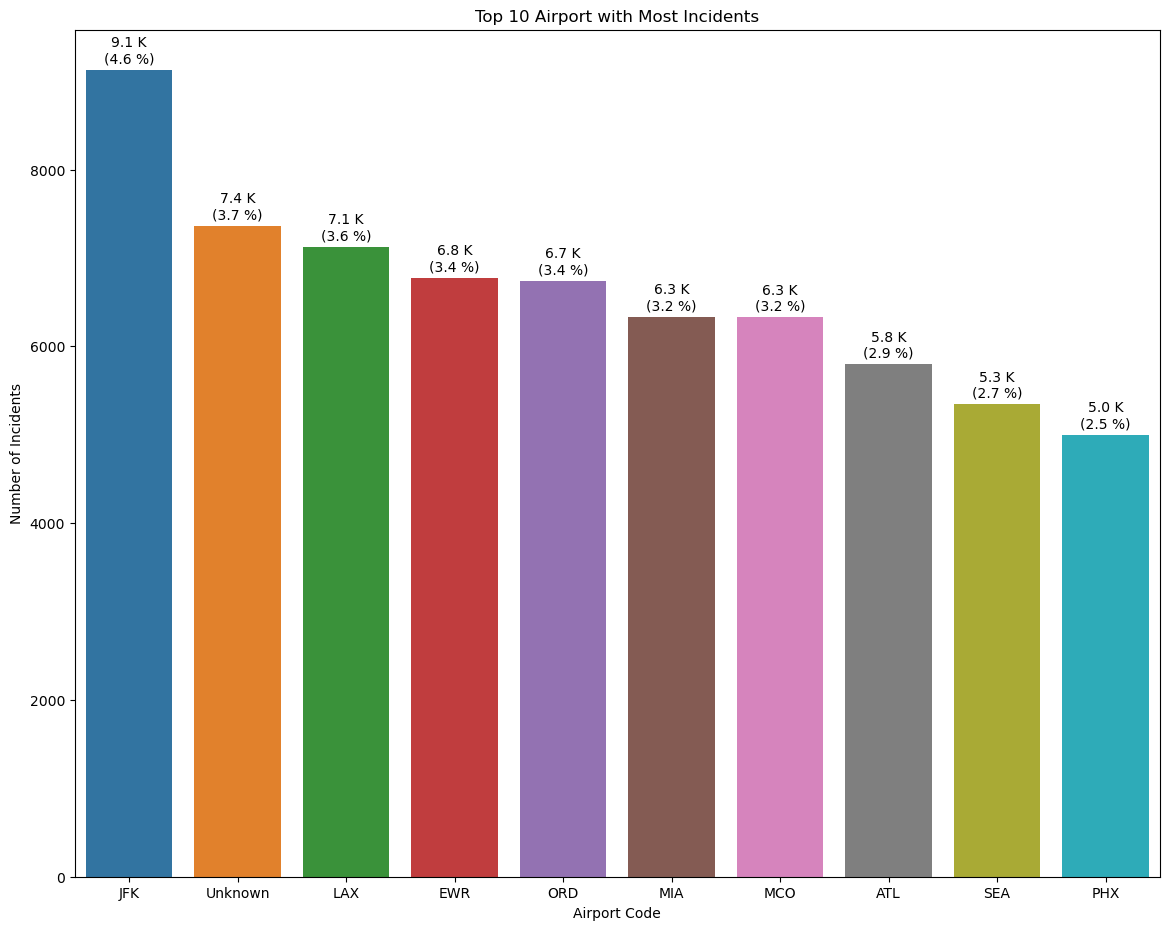

In [72]:
plt.figure(figsize=(14,11))
fig = sns.barplot(data= df_airport, x = 'Airport Code', y = 'Number of Incidents')

label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000, df_airport['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)




plt.title('Top 10 Airport with Most Incidents')
plt.show()

Kode untuk menampilkan countplot incident by claim site

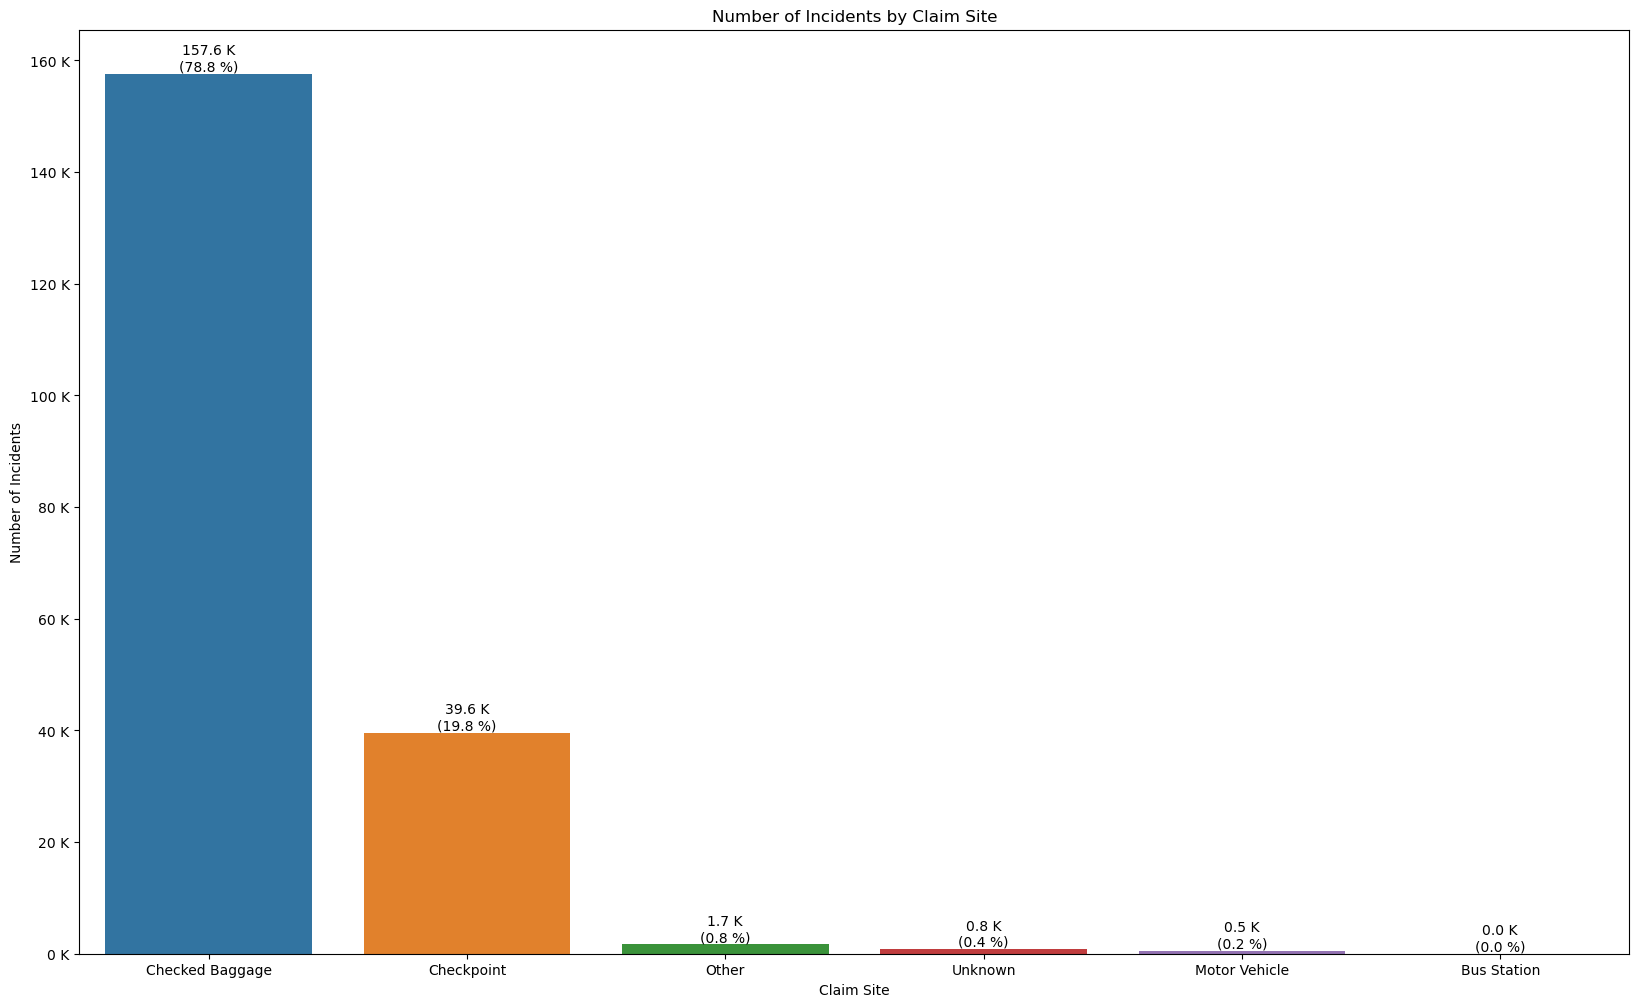

In [73]:
plt.figure(figsize=(20,12))
fig = sns.countplot(data= df, x = 'Claim Site', order=df['Claim Site'].value_counts().index)

percentage = df['Claim Site'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,160001, 20000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Claim Site')

plt.show()

boxplot untuk mengetahui outlayer

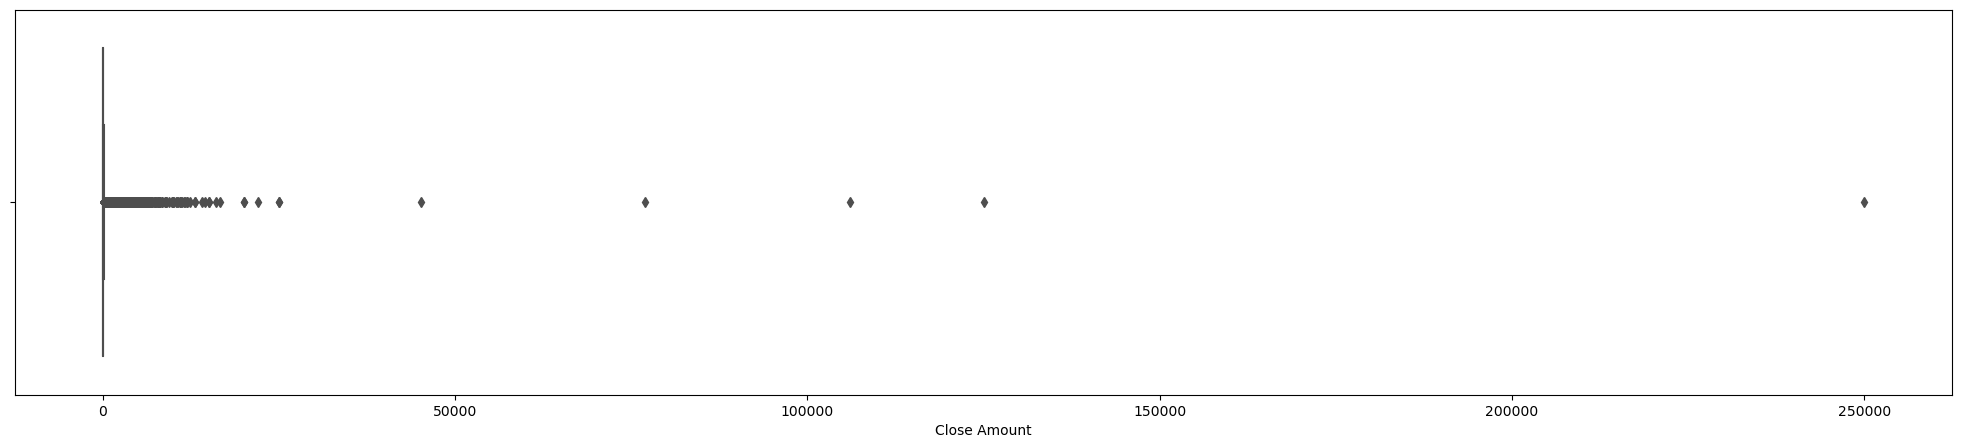

In [74]:
plt.figure(figsize=(25,5))
sns.boxplot(x=df1['Close Amount'],palette='YlGnBu')
plt.show()

barplot untuk mengetahui jumlah klaim yang diajukan perhari 
biasanya para penumpang melapor setiap hari senin atau selasa mungkin karena hari sibuk perjalanan bisnis

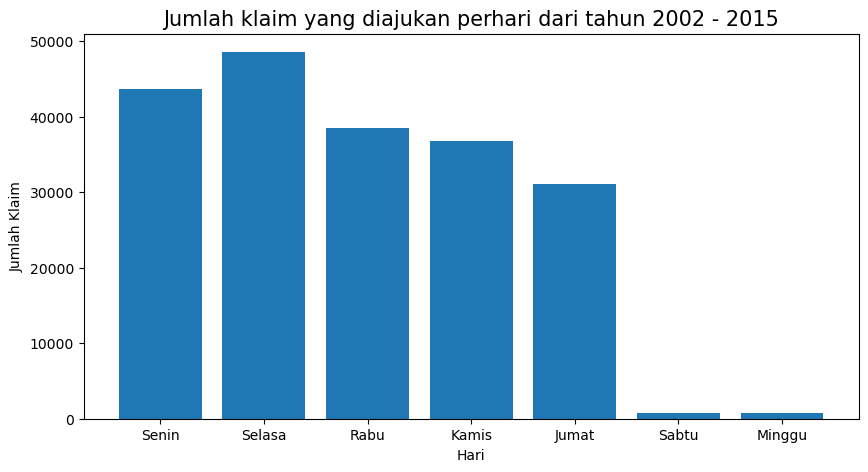

In [75]:
plt.figure(figsize=(10,5))
plt.bar(df1['Day'].value_counts().index, df1['Day'].value_counts().values)
plt.xlabel('Hari')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan perhari dari tahun 2002 - 2015', size = 15)
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

In [76]:
df1['Status'].unique()

array(['Approved', 'Denied', 'Settled', 'In Process', 'Unknown',
       'Approve in Full'], dtype=object)

Code membikin barplot untuk mengetahui jumlah kalim yang diterima oleh TSA

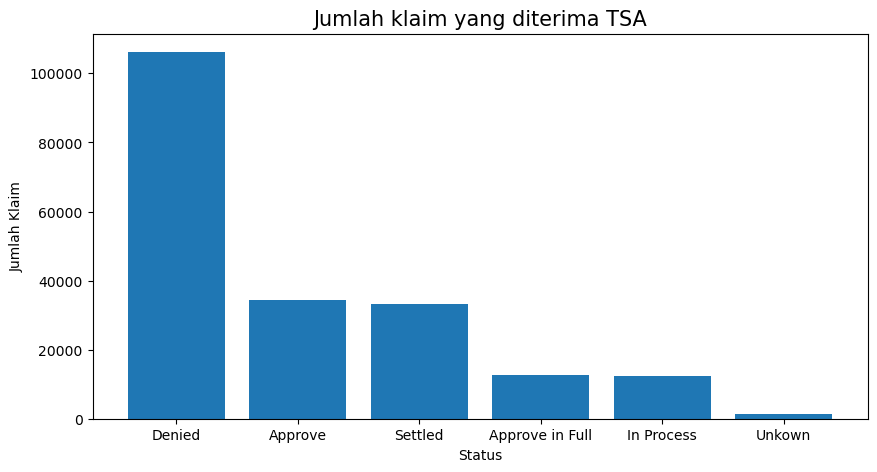

In [77]:
plt.figure(figsize=(10,5))
plt.bar(df1['Status'].value_counts().index, df1['Status'].value_counts().values)
# sns.barplot(df['incident_day'].value_counts().index, df['incident_day'].value_counts().values, color = 'steelblue')
plt.xlabel('Status')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diterima TSA', size = 15)
plt.xticks(range(6), ['Denied', 'Approve', 'Settled','Approve in Full','In Process','Unkown'])
plt.show()

Barplot untuk mengetahui jumlah klaim yang diajukan  perbulan dari tahun 2002 sampai 2015 bulan yang paling  besar adalah bulan agustus dan januari

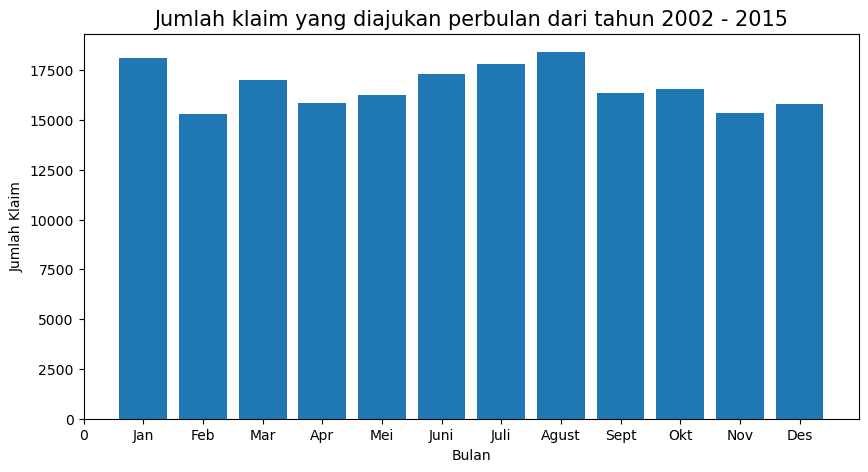

In [78]:
plt.figure(figsize=(10,5))
plt.bar(df1['Month'].value_counts().index, df1['Month'].value_counts().values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan perbulan dari tahun 2002 - 2015', size = 15)
plt.xticks(range(13), ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Juni', 'Juli','Agust','Sept','Okt','Nov','Des'])
plt.show()

barplot klaim yang diajukan pertahun dari tahun 2002-2015

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


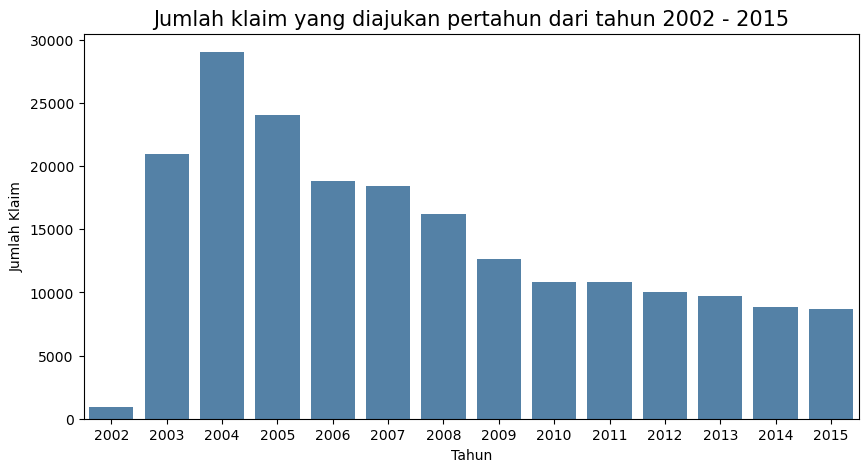

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(df1['Year'].value_counts().index, df1['Year'].value_counts().values, color = 'steelblue')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan pertahun dari tahun 2002 - 2015', size = 15)
plt.show();

lineplot klaim yang diajukan pertahun dari tahun 2002-2015

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


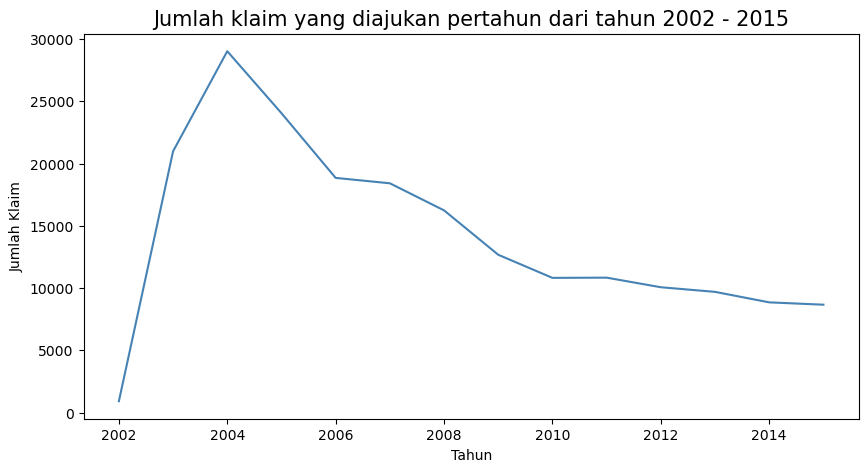

In [80]:
plt.figure(figsize=(10,5))
# plt.bar(df['incident_year'].value_counts().index, df['incident_year'].value_counts().values)
sns.lineplot(df1['Year'].value_counts().index, df1['Year'].value_counts().values, color = 'steelblue')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan pertahun dari tahun 2002 - 2015', size = 15)
plt.show();

# Memakai data yang diambil untuk mencegah outlier

In [81]:
df[df['Claim Amount'] <1000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,Denied
15,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny
16,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Luggage (all types including footlockers),50.00,Denied,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,Unknown
204263,2015123027969,2015-12-17,2015-12-02,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,Unknown
204264,2016010428072,2015-12-22,2015-12-20,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,Unknown
204265,2016011328300,2015-12-30,2015-12-28,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,Unknown


In [82]:
claimbersih = df[(df['Claim Amount'] <1000) & (df['Close Amount']< 2500.00)]
claimbersih

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,Denied
15,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny
16,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Luggage (all types including footlockers),50.00,Denied,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,Unknown
204263,2015123027969,2015-12-17,2015-12-02,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,Unknown
204264,2016010428072,2015-12-22,2015-12-20,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,Unknown
204265,2016011328300,2015-12-30,2015-12-28,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,Unknown


Scaterplot penyebaran claim amount dan close amount

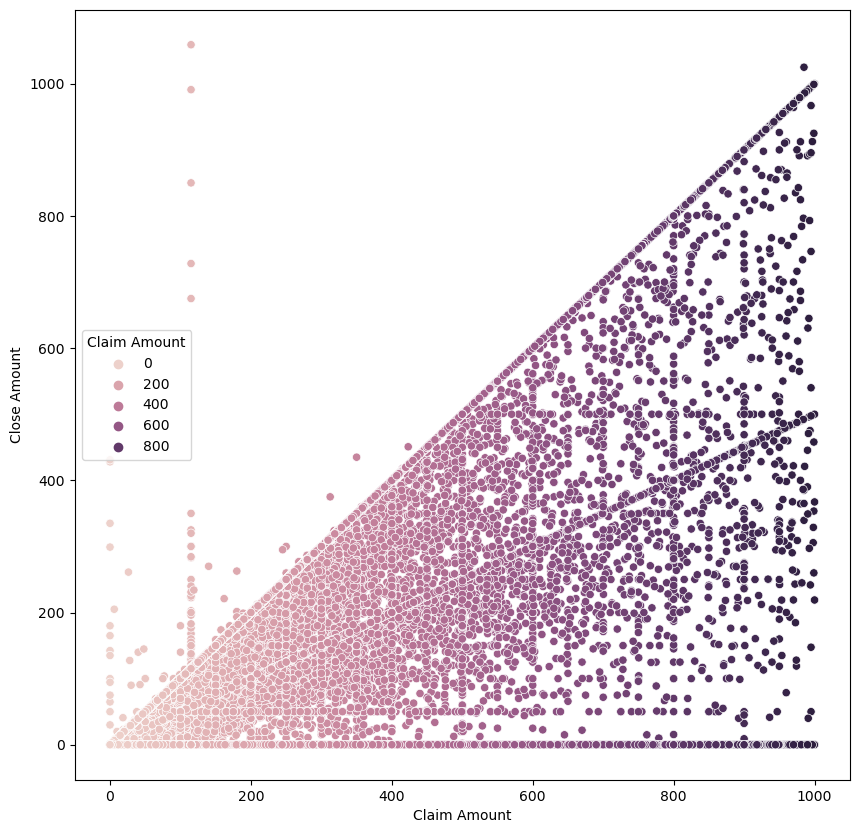

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=claimbersih,x='Claim Amount',y='Close Amount',hue='Claim Amount')
plt.show()

heatmap korelasi antara claim amount dan close amunt

<AxesSubplot:>

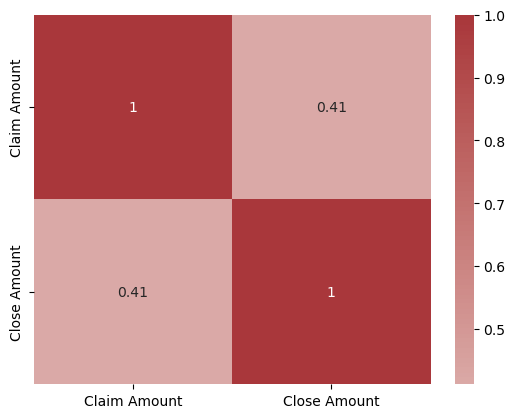

In [84]:
sns.heatmap(data=claimbersih.corr(),annot= True ,cmap="vlag",center=0)

korelasi memakai spearman

In [85]:
claimbersih.corr(method='spearman')

,Claim Amount,Close Amount
Claim Amount,1.000000,0.203938
Close Amount,0.203938,1.000000


In [86]:
display(df1.describe(), df1.describe(include='object'))

,Claim Amount,Close Amount,Day,Month,Year
count,2.001190e+05,200119.000000,200119.000000,200119.000000,200119.000000
mean,1.506163e+07,75.383345,1.843438,6.452950,2007.573279
std,6.706230e+09,766.450120,1.412290,3.423108,3.601984
min,0.000000e+00,0.000000,0.000000,1.000000,2002.000000
25%,3.149000e+01,0.000000,1.000000,3.000000,2004.000000
50%,1.150000e+02,0.000000,2.000000,7.000000,2007.000000
75%,3.114300e+02,50.000000,3.000000,9.000000,2010.000000
max,3.000000e+12,250000.000000,6.000000,12.000000,2015.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status
count,200119,200119,200119,200119,200119,200119,200119,200119
unique,200110,465,485,317,11,6,141,6
top,2013053003894,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,Denied
freq,2,9455,9126,22609,116441,157612,44715,106167


## Latitude & Longtitude

In [87]:
airport = pd.read_excel('Airport Data.xlsx')
airport.head()

,Code,Airport Name,Lattitude,Longtitude
0,GKA,GOROKA,-6082.0,145392.0
1,LAE,NaN,0.0,0.0
2,MAG,MADANG,-5207.0,145789.0
3,HGU,MOUNT HAGEN,-5826.0,144296.0
4,LAE,NADZAB,-6570.0,146726.0


In [88]:
airport.dropna(inplace=True)

In [89]:
airport.set_index('Code',inplace=True)

In [90]:
df1['Airport Code']

0         BWI    
1         PHX    
2         ATL    
3         BWI    
4         BWI    
         ...     
200114    Unknown
200115    Unknown
200116    Unknown
200117    Unknown
200118    Unknown
Name: Airport Code, Length: 200119, dtype: object

Kode dibawah ini umtuk mendapatkan Latitude

In [91]:
a=[]

for i in df1['Airport Code']:
    if i in airport.index :
        b = airport.loc[i]['Lattitude']/1000
        a.append(b)

    else :
        b = np.nan
        a.append(b)
df1['Latitude']=a
df1

,Claim Number,Incident Date,Date Received,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Day,Month,Year,Latitude
0,12772,2002-05-09,2002-06-20,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,3,6,2002,39.175
1,14268,2002-06-16,2002-06-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,3,6,2002,33.434
2,2004102965797,2002-05-04,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,1,6,2002,33.640
3,14460,2002-06-12,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,0,7,2002,39.175
4,13334,2002-06-04,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,0,7,2002,39.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,2015120427297,2015-10-16,2015-11-20,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,4,11,2015,NaN
200115,2015123027969,2015-12-02,2015-12-17,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,3,12,2015,NaN
200116,2016010428072,2015-12-20,2015-12-22,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,1,12,2015,NaN
200117,2016011328300,2015-12-28,2015-12-30,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,2,12,2015,NaN


Kode dibawah ini umtuk mendapatkan Longtitude

In [92]:
a=[]

for i in df1['Airport Code']:
    if i in airport.index :
        b = airport.loc[i]['Longtitude']/1000
        a.append(b)

    else :
        b = np.nan
        a.append(b)
df1['Longtitude']=a
df1

,Claim Number,Incident Date,Date Received,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Day,Month,Year,Latitude,Longtitude
0,12772,2002-05-09,2002-06-20,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approved,75.0,3,6,2002,39.175,-76.668
1,14268,2002-06-16,2002-06-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,3,6,2002,33.434,-112.008
2,2004102965797,2002-05-04,2002-06-25,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,1,6,2002,33.640,-84.427
3,14460,2002-06-12,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Unknown,Checkpoint,Eyeglasses,16.71,Approved,17.0,0,7,2002,39.175,-76.668
4,13334,2002-06-04,2002-07-08,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Unknown,Other,Clothing,450.00,Denied,0.0,0,7,2002,39.175,-76.668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,2015120427297,2015-10-16,2015-11-20,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.0,4,11,2015,NaN,NaN
200115,2015123027969,2015-12-02,2015-12-17,Unknown,Unknown,American Airlines,Property Damage,Checked Baggage,Audio/Video,115.00,Unknown,0.0,3,12,2015,NaN,NaN
200116,2016010428072,2015-12-20,2015-12-22,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,0.0,1,12,2015,NaN,NaN
200117,2016011328300,2015-12-28,2015-12-30,Unknown,Unknown,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,0.0,2,12,2015,NaN,NaN


## Save Data Frame dengan format csv

In [93]:
df1.to_csv ('TSAREAL.csv')

Rekomendasi atau Saran
Berikut adalah beberapa rekomendasi yang dapat diberikan berdasarkan kesimpulan di atas:

TSA dapat menaingkatkan keamanan  untuk bandara-bandara yang termasuk ke dalam bandara dengan arus lalu lintas udara tersibuk di Amerika Serikat

TSA perlu lebih memperhatikan serta meningkatkan keamanan dengan menambah petugas pada titik Checked Baggage dan Checkpoint di setiap bandara.

TSA perlu menjalin kerjasama atau berkomunikasi mengenai keamanan barang-barang yang dibawa oleh penumpang dengan maskapai-maskapai yang terkait.

Untuk beberapa barang yang tidak dibayarkan klaim nya oleh pihak TSA maupun bandara, TSA bisa melakukan kerjasama dengan badan asuransi tertentu, untuk meningkatkan rasa keselamatan dan kepuasan pelanggan, baik asuransi jiwa maupun barang.

Untuk data yang hilang TSA dapat bekerja sama dengan yang mencari data agar jelas datanya

TSA kedepannya dapat mencah human error agar tidak terjadi outlier yang sangat jauh